# SVD (Singular Value Decomposition)
특이값 분해
PCA는 정방행렬만을 고유 벡터로 분해할 수 있지만, SVD는 행과 열의 크기가 다른 행렬에도 적용

과정
대각행렬의 비대각인 부분과 특이값이 0인 부분 제거하여 차원을 줄임

Truncated SVD: 대각 원소 중 상위 몇 개만 추출하여 차원을 더욱 줄인 형태

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U:\n", np.round(U, 3))
print("Sigma:\n", np.round(Sigma, 3))
print("Vt:\n", np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma:
 [3.423 2.023 0.463 0.079]
Vt:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [4]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
# 데이터 세트 로우 간 의존성이 있을 경우
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [6]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U:\n", np.round(U, 3))
print("Sigma:\n", np.round(Sigma, 3))
print("Vt:\n", np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U:
 [[ 0.246  0.583  0.711 -0.307]
 [-0.774 -0.017  0.466  0.427]
 [-0.529  0.566 -0.466 -0.427]
 [ 0.246  0.583 -0.245  0.735]]
Sigma:
 [2.663 0.807 0.    0.   ]
Vt:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.284 -0.795  0.535 -0.046]
 [-0.656 -0.002 -0.291  0.696]]


In [8]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD
Scipy 에서만 지원

In [10]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6, 6))
print(matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print(U.shape, Sigma.shape, Vt.shape)
print("Sigma:", Sigma)

[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6) (6,) (6, 6)
Sigma: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [11]:
# Truncated SVD
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print(U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print(Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print(matrix_tr)

(6, 4) (4,) (4, 6)
[0.55463089 0.83865238 0.88116505 3.2535007 ]
[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


Scikit Learn의 TruncatedSVD class

Text(0, 0.5, 'TruncatedSVD Component 2')

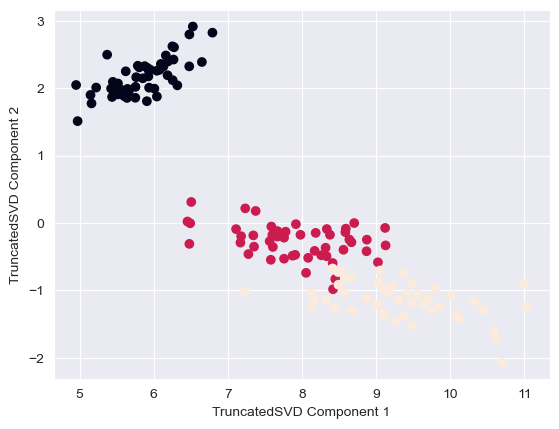

In [12]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel("TruncatedSVD Component 1")
plt.ylabel("TruncatedSVD Component 2")

Text(0.5, 1.0, 'PCA Transformed')

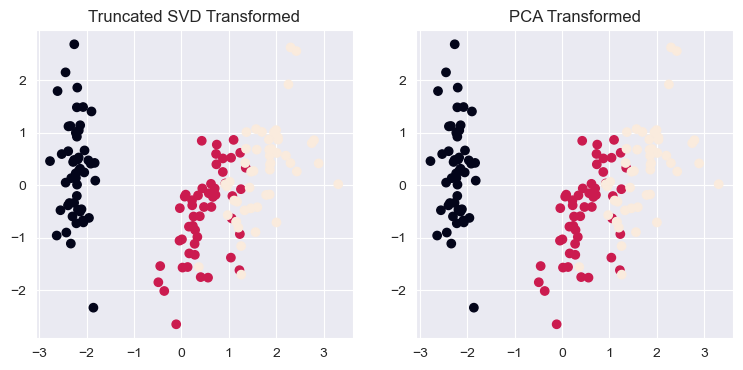

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)

ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title("Truncated SVD Transformed")
ax2.set_title("PCA Transformed")

In [14]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3271488902576465e-15
2.3765711620882257e-16


PCA는 SVD 알고리즘으로 구현되어 있음
SVD는 희소 행렬에 대한 변환도 가능함
Computer Vision에서 이미지 압축을 통한 패턴 인식, 신호 처리에 사용
LSA(텍스트 토픽 모델링 기법) 기반 알고리즘